In [ ]:
!pip install pandas-profiling xgboost gradio

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from ydata_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder

In [ ]:
!wget https://github.com/Refactory-Capstone-Project/Loan-default-prediction-challenge-/raw/main/Loan_Prediction.zip

In [ ]:
!unzip /content/Loan_Prediction.zip

# Demographic data (traindemographics.csv)

In [ ]:
train_demo = pd.read_csv("/content/traindemographics.csv")
train_demo.head()

In [9]:
train_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4346 non-null   object 
 1   birthdate                   4346 non-null   object 
 2   bank_account_type           4346 non-null   object 
 3   longitude_gps               4346 non-null   float64
 4   latitude_gps                4346 non-null   float64
 5   bank_name_clients           4346 non-null   object 
 6   bank_branch_clients         51 non-null     object 
 7   employment_status_clients   3698 non-null   object 
 8   level_of_education_clients  587 non-null    object 
dtypes: float64(2), object(7)
memory usage: 305.7+ KB


In [10]:
train_demo.dtypes

customerid                     object
birthdate                      object
bank_account_type              object
longitude_gps                 float64
latitude_gps                  float64
bank_name_clients              object
bank_branch_clients            object
employment_status_clients      object
level_of_education_clients     object
dtype: object

In [11]:
train_demo[train_demo['customerid'].duplicated(keep=False)].sort_values('customerid')

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
1414,8a858e625c8d993a015c938f829f77ee,1988-12-20 00:00:00.000000,Savings,5.768333,5.561992,First Bank,NaN,Permanent,NaN
1928,8a858e625c8d993a015c938f829f77ee,1988-12-20 00:00:00.000000,Savings,5.768333,5.561992,First Bank,NaN,Permanent,NaN
445,8a858e6c5c88d145015c8b9627cd5a48,1979-09-30 00:00:00.000000,Savings,3.367008,6.497313,Sterling Bank,NaN,Permanent,NaN
1090,8a858e6c5c88d145015c8b9627cd5a48,1979-09-30 00:00:00.000000,Savings,3.367008,6.497313,Sterling Bank,NaN,Permanent,NaN
1996,8a858ec65cc6352b015cc64525ea0763,1985-01-30 00:00:00.000000,Savings,3.845728,7.411737,GT Bank,NaN,Permanent,NaN
1520,8a858ec65cc6352b015cc64525ea0763,1985-01-30 00:00:00.000000,Savings,3.845728,7.411737,GT Bank,NaN,Permanent,NaN
272,8a858edd57f790040157ffe9b6ed3fbb,1988-01-18 00:00:00.000000,Other,3.782563,7.171356,First Bank,NaN,Permanent,Secondary
517,8a858edd57f790040157ffe9b6ed3fbb,1988-01-18 00:00:00.000000,Other,3.782563,7.171356,First Bank,NaN,Permanent,Secondary
4126,8a858f1e5baffcc9015bb02b505f180d,1983-04-06 00:00:00.000000,Savings,6.969350,4.818535,GT Bank,NaN,Permanent,NaN
3021,8a858f1e5baffcc9015bb02b505f180d,1983-04-06 00:00:00.000000,Savings,6.969350,4.818535,GT Bank,NaN,Permanent,NaN


In [12]:
train_demo = train_demo.drop_duplicates(subset='customerid', keep='first', inplace=False)

In [13]:
train_demo['birthdate'] = pd.to_datetime(train_demo['birthdate'])

train_demo["birthdate_year"] = pd.to_datetime(train_demo["birthdate"]).dt.year
train_demo["birthdate_month"] = pd.to_datetime(train_demo["birthdate"]).dt.month
train_demo["birthdate_day"] = pd.to_datetime(train_demo["birthdate"]).dt.day
train_demo.dtypes

customerid                            object
birthdate                     datetime64[ns]
bank_account_type                     object
longitude_gps                        float64
latitude_gps                         float64
bank_name_clients                     object
bank_branch_clients                   object
employment_status_clients             object
level_of_education_clients            object
birthdate_year                         int32
birthdate_month                        int32
birthdate_day                          int32
dtype: object

In [14]:
train_demo['bank_account_type'].value_counts()

bank_account_type
Savings    3414
Other       864
Current      56
Name: count, dtype: int64

In [15]:
encoder = LabelEncoder()
train_demo['bank_account_type'] = encoder.fit_transform(train_demo['bank_account_type'])
train_demo[['bank_account_type']]

,bank_account_type
0,2
1,2
2,2
3,2
4,2
...,...
4341,1
4342,2
4343,2
4344,2


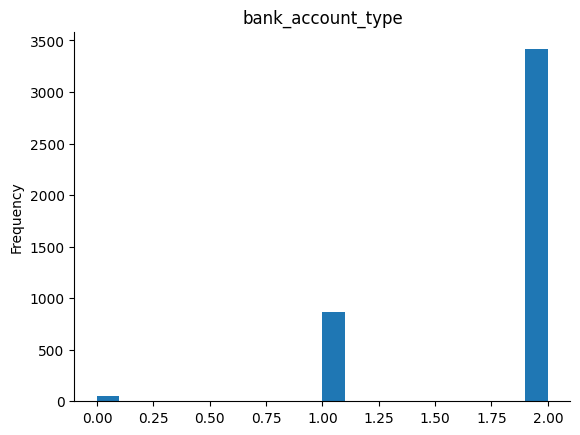

In [16]:

train_demo['bank_account_type'].plot(kind='hist', bins=20, title='bank_account_type')
plt.gca().spines[['top', 'right',]].set_visible(False)

Based off of the graph. We can see that Savings is represented by '2', Other is represented by '1' and Current is represented by 0

In [17]:
train_demo['longitude_gps'].describe()


count    4334.000000
mean        4.624000
std         7.194031
min      -118.247009
25%         3.354857
50%         3.591668
75%         6.543691
max       151.209290
Name: longitude_gps, dtype: float64

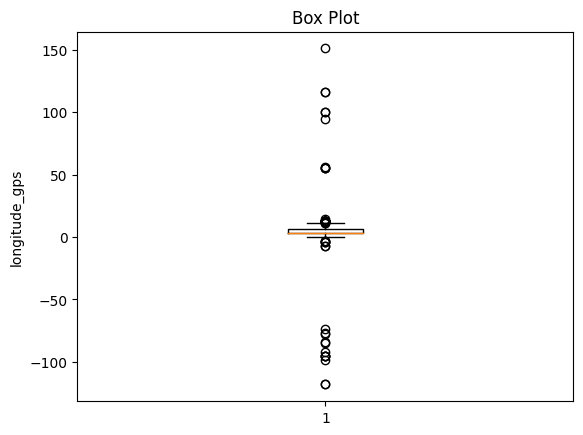

In [18]:
train_demo['longitude_gps'] = train_demo['longitude_gps'].astype(float)
plt.boxplot(train_demo['longitude_gps'])
plt.title('Box Plot')
plt.ylabel('longitude_gps')
plt.show()

The Box plot shows the column has many outliers and they can be replaced with zero

In [19]:
train_demo["longitude_gps"] = train_demo["longitude_gps"] \
                                .where(train_demo["longitude_gps"] < 20)\
                                .where(train_demo["longitude_gps"] > -20)

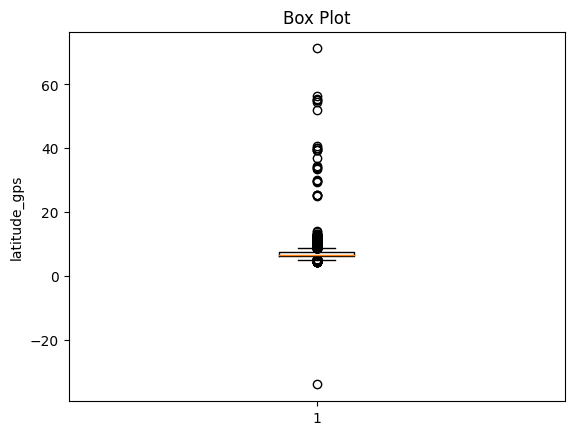

In [20]:
train_demo['latitude_gps'] = train_demo['latitude_gps'].astype(float)
plt.boxplot(train_demo['latitude_gps'])
plt.title('Box Plot')
plt.ylabel('latitude_gps')
plt.show()

In [21]:
train_demo["latitude_gps"] = train_demo["latitude_gps"] \
                                .where(train_demo["latitude_gps"] < 20)\
                                .where(train_demo["latitude_gps"] > -20)

In [22]:
train_demo['bank_branch_clients'].info()

<class 'pandas.core.series.Series'>
Index: 4334 entries, 0 to 4345
Series name: bank_branch_clients
Non-Null Count  Dtype 
--------------  ----- 
51 non-null     object
dtypes: object(1)
memory usage: 67.7+ KB


In [23]:
train_demo.drop(columns=['bank_branch_clients'], inplace=True)

In [24]:
train_demo['employment_status_clients'].isnull().value_counts()

employment_status_clients
False    3686
True      648
Name: count, dtype: int64

There are 648 null values however dropping them will get rid of important data. The null values can be replaced by "Unknown"

In [25]:
train_demo["employment_status_clients"]= train_demo["employment_status_clients"].fillna("Unknown")
train_demo["employment_status_clients"].value_counts()

employment_status_clients
Permanent        3134
Unknown           648
Self-Employed     348
Student           142
Unemployed         57
Retired             4
Contract            1
Name: count, dtype: int64

# Performance data (trainperf.csv)

This is the repeat loan that the customer has taken for which we need to predict the performance of. Basically, we need to predict if whether this loan would default given all previous loans and demographics of a customer

In [26]:
train_perf = pd.read_csv('/content/trainperf.csv')
train_perf.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good


In [27]:
train_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customerid     4368 non-null   object 
 1   systemloanid   4368 non-null   int64  
 2   loannumber     4368 non-null   int64  
 3   approveddate   4368 non-null   object 
 4   creationdate   4368 non-null   object 
 5   loanamount     4368 non-null   float64
 6   totaldue       4368 non-null   float64
 7   termdays       4368 non-null   int64  
 8   referredby     587 non-null    object 
 9   good_bad_flag  4368 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 341.4+ KB


In [ ]:
train_perf['customerid'].duplicated().sum()

0

In [28]:
train_perf['approveddate'] = pd.to_datetime(train_perf['approveddate'])

train_perf.dtypes

customerid               object
systemloanid              int64
loannumber                int64
approveddate     datetime64[ns]
creationdate             object
loanamount              float64
totaldue                float64
termdays                  int64
referredby               object
good_bad_flag            object
dtype: object

In [29]:
train_perf['creationdate'] = pd.to_datetime(train_perf['creationdate'])
train_perf.dtypes

customerid               object
systemloanid              int64
loannumber                int64
approveddate     datetime64[ns]
creationdate     datetime64[ns]
loanamount              float64
totaldue                float64
termdays                  int64
referredby               object
good_bad_flag            object
dtype: object

referredby column has null values and will need to be cleaned

In [33]:
train_perf['referredby'].isnull().value_counts()

referredby
True     3781
False     587
Name: count, dtype: int64

In [34]:
train_perf["referredby"]= train_perf["referredby"].fillna("Unknown")
train_perf["referredby"].value_counts()

referredby
Unknown                             3781
8a858fc55b2548dd015b286e452c678c       8
8a858f965bb63a25015bc2ddf2577416       3
8a858eeb5bb559d3015bb57fa13f10de       3
8a858e125b391784015b395fa56243e6       3
                                    ... 
8a858e3d5c3b5122015c43f776bd4a3a       1
8a858f7a5b39a003015b39ca67ab2efb       1
8a858fa359d61dae0159d698bf503d29       1
8a858e6f5cd5e874015ce084c86e2a87       1
8a858eda5c8863ff015c9dead65807bb       1
Name: count, Length: 522, dtype: int64

In [37]:
train_perf["good_bad_flag"].value_counts()

good_bad_flag
1    3416
0     952
Name: count, dtype: int64

In [38]:
encoder = LabelEncoder()
train_perf['good_bad_flag'] = encoder.fit_transform(train_perf['good_bad_flag'])
train_perf[['good_bad_flag']]

,good_bad_flag
0,1
1,1
2,1
3,1
4,1
...,...
4363,0
4364,0
4365,0
4366,0


In [39]:
train_perf.head(5)

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,Unknown,1
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,Unknown,1
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,Unknown,1
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,Unknown,1
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,Unknown,1


# Previous loans data (trainprevloans.csv)

This dataset contains all previous loans that the customer had prior to the loan above that we want to predict the performance of. Each loan will have a different systemloanid, but the same customerid for each customer.

In [41]:
train_prevloans = pd.read_csv('/content/trainprevloans.csv')
train_prevloans.head(5)

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000


In [42]:
train_prevloans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18183 entries, 0 to 18182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       18183 non-null  object 
 1   systemloanid     18183 non-null  int64  
 2   loannumber       18183 non-null  int64  
 3   approveddate     18183 non-null  object 
 4   creationdate     18183 non-null  object 
 5   loanamount       18183 non-null  float64
 6   totaldue         18183 non-null  float64
 7   termdays         18183 non-null  int64  
 8   closeddate       18183 non-null  object 
 9   referredby       1026 non-null   object 
 10  firstduedate     18183 non-null  object 
 11  firstrepaiddate  18183 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 1.7+ MB


In [44]:
train_prevloans[train_prevloans['customerid'].duplicated(keep=False)].sort_values('customerid')

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
16602,8a1a1e7e4f707f8b014f797718316cad,301947045,4,2017-06-21 22:09:51.000000,2017-06-21 21:09:44.000000,30000.0,39000.0,60,2017-07-26 19:48:11.000000,NaN,2017-07-21 00:00:00.000000,2017-07-20 15:05:33.000000
5216,8a1a1e7e4f707f8b014f797718316cad,301620412,1,2016-05-13 15:29:37.000000,2016-05-13 14:29:31.000000,10000.0,13000.0,30,2016-06-15 00:03:33.000000,NaN,2016-06-13 00:00:00.000000,2016-06-14 10:41:13.000000
17546,8a1a1e7e4f707f8b014f797718316cad,301632940,2,2016-06-15 11:22:38.000000,2016-06-15 10:22:32.000000,10000.0,13000.0,30,2016-07-15 13:59:02.000000,NaN,2016-07-15 00:00:00.000000,2016-07-15 13:43:58.000000
7999,8a1a1e7e4f707f8b014f797718316cad,301916386,3,2017-05-23 14:21:42.000000,2017-05-23 13:20:30.000000,20000.0,24500.0,30,2017-06-21 21:58:00.000000,NaN,2017-06-22 00:00:00.000000,2017-06-21 21:47:51.000000
12199,8a1a32fc49b632520149c3b8fdf85139,301937031,7,2017-06-13 11:02:36.000000,2017-06-13 10:01:27.000000,20000.0,24500.0,30,2017-07-13 18:45:26.000000,NaN,2017-07-13 00:00:00.000000,2017-07-13 18:35:18.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
18111,8a858fff5a36fe68015a3b8dcb8a3843,301852396,3,2017-04-02 13:49:34.000000,2017-04-02 12:49:27.000000,10000.0,11500.0,15,2017-04-17 13:03:52.000000,NaN,2017-04-17 00:00:00.000000,2017-04-17 12:48:43.000000
7549,8a858fff5a36fe68015a3b8dcb8a3843,301951448,6,2017-06-25 15:51:04.000000,2017-06-25 14:50:57.000000,20000.0,24500.0,30,2017-07-23 15:31:42.000000,NaN,2017-07-25 00:00:00.000000,2017-07-23 15:21:33.000000
10005,8a858fff5a36fe68015a3b8dcb8a3843,301873835,4,2017-04-19 20:22:37.000000,2017-04-19 19:22:30.000000,10000.0,11450.0,15,2017-04-21 21:45:31.000000,NaN,2017-05-04 00:00:00.000000,2017-04-21 21:30:22.000000
7550,8a858fff5a36fe68015a3b8dcb8a3843,301830401,2,2017-03-03 07:16:35.000000,2017-03-03 06:16:15.000000,10000.0,13000.0,30,2017-04-02 00:16:27.000000,NaN,2017-04-03 00:00:00.000000,2017-04-02 00:01:17.000000


In [45]:
train_prevloans = train_prevloans.drop_duplicates(subset='customerid', keep='first', inplace=False)

In [46]:
train_prevloans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4359 entries, 0 to 18181
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       4359 non-null   object 
 1   systemloanid     4359 non-null   int64  
 2   loannumber       4359 non-null   int64  
 3   approveddate     4359 non-null   object 
 4   creationdate     4359 non-null   object 
 5   loanamount       4359 non-null   float64
 6   totaldue         4359 non-null   float64
 7   termdays         4359 non-null   int64  
 8   closeddate       4359 non-null   object 
 9   referredby       587 non-null    object 
 10  firstduedate     4359 non-null   object 
 11  firstrepaiddate  4359 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 442.7+ KB


In [48]:
train_prevloans['approveddate'] =pd.to_datetime(train_prevloans['approveddate'])
train_prevloans['creationdate'] =pd.to_datetime(train_prevloans['creationdate'])
train_prevloans['firstduedate'] =pd.to_datetime(train_prevloans['firstduedate'])
train_prevloans['firstrepaiddate'] =pd.to_datetime(train_prevloans['firstrepaiddate'])
train_prevloans['closeddate'] =pd.to_datetime(train_prevloans['closeddate'])
train_prevloans.dtypes

customerid                 object
systemloanid                int64
loannumber                  int64
approveddate       datetime64[ns]
creationdate       datetime64[ns]
loanamount                float64
totaldue                  float64
termdays                    int64
closeddate         datetime64[ns]
referredby                 object
firstduedate       datetime64[ns]
firstrepaiddate    datetime64[ns]
dtype: object

In [50]:
train_prevloans['referredby'].isnull().value_counts()

referredby
True     3772
False     587
Name: count, dtype: int64

In [51]:
train_prevloans["referredby"]= train_prevloans["referredby"].fillna("Unknown")
train_prevloans["referredby"].value_counts()

referredby
Unknown                             3772
8a858fc55b2548dd015b286e452c678c       8
8a858f965bb63a25015bc2ddf2577416       3
8a858eeb5bb559d3015bb57fa13f10de       3
8a858e125b391784015b395fa56243e6       3
                                    ... 
8a858ee65be8d42d015be8ed0ebb0f5f       1
8a858eda552adcc2015548f0eb523fc3       1
8a858f2c585375f00158688cf76b3db7       1
8a858f305cb1ec4e015cc41c66eb41b8       1
8a858eaa55a0b8ae0155ad2cab5e49cc       1
Name: count, Length: 522, dtype: int64

In [ ]:
train_prevloans['loanstatus'] = (train_prevloans['totaldue'] - train_prevloans['loanamount']).apply(lambda x: 1 if x >= 0 else 0)
train_prevloans = train_prevloans.drop(['customerid', 'systemloanid', 'approveddate', 'creationdate', 'closeddate', 'referredby',
              'firstduedate', 'firstrepaiddate', 'loanamount', 'totaldue'], axis=1)

train_prevloans.loc[:,"loanstatus"]


0        1
3        1
4        1
5        1
7        1
        ..
18072    1
18094    1
18156    1
18166    1
18181    1
Name: loanstatus, Length: 4359, dtype: int64

In [ ]:
x_train = train_prevloans.drop('loanstatus', axis=1)
y_train = train_prevloans['loanstatus']

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = DecisionTreeClassifier(random_state=42)

In [ ]:
test_prevloans = pd.read_csv('/content/testprevloans.csv')
test_prevloans = test_prevloans.drop_duplicates (subset='customerid', keep='first', inplace=False)
test_prevloans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1442 entries, 0 to 5906
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       1442 non-null   object 
 1   systemloanid     1442 non-null   int64  
 2   loannumber       1442 non-null   int64  
 3   approveddate     1442 non-null   object 
 4   creationdate     1442 non-null   object 
 5   loanamount       1442 non-null   float64
 6   totaldue         1442 non-null   float64
 7   termdays         1442 non-null   int64  
 8   closeddate       1442 non-null   object 
 9   referredby       182 non-null    object 
 10  firstduedate     1442 non-null   object 
 11  firstrepaiddate  1442 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 146.5+ KB


In [ ]:
x_test = test_prevloans.drop('loanstatus', axis=1)
y_test= test_prevloans['loanstatus']
model.fit(x_train, y_train)
y_predict=model.predict(x_test)
accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_predict))


Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1442

    accuracy                           1.00      1442
   macro avg       1.00      1.00      1.00      1442
weighted avg       1.00      1.00      1.00      1442



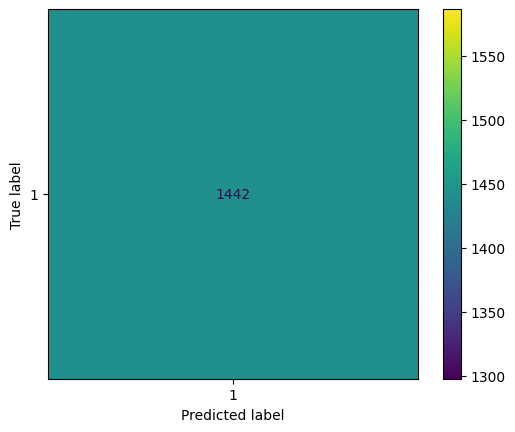

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model,x_test,y_test)